<a href="https://colab.research.google.com/github/Meta-Sean/Derivatives-Markets-Advanced-Modeling-and-Strategies/blob/main/Derivatives_Markets_Advanced_Modeling_and_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward Contracts

Pricing Formulas & Their Derivations
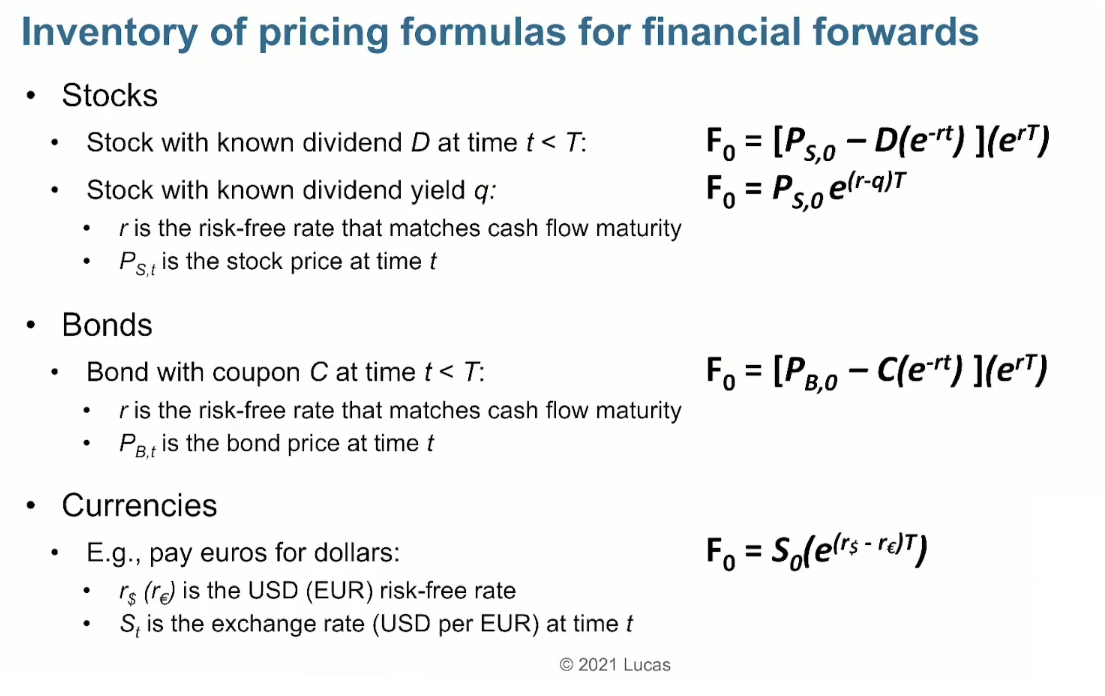

Southern California Edison (SCE) will need to buy 200,000 barrels of oil in 10 days, and it is worried about fuel costs rising. Suppose SCE goes long 200 oil forward contracts of the April contract (it is March), each for 1,000 barrels of oil, at the current forward price of $50 per barrel.

Suppose forward prices change each day as follows:
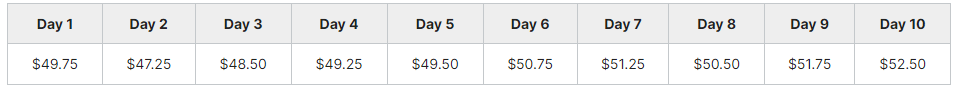


Answer the following questions.

What is the mark-to-market profit or loss (in dollars) that SCE will have on each date?
What is SCE's total profit or loss after 10 days?
Explain why this may not be a perfect hedge for SCE.

In [ ]:
import math
import pandas as pd

prices = [49.75,	47.25,	48.50,	49.25,	49.50,	50.75,	51.25,	50.50,	51.75,	52.50]

n = 1000
contracts = 200
curr_forward_price = 50
prices.insert(0,curr_forward_price)

def mark_to_market(contracts,n, prices):
  for i in range(0,len(prices)-1):
   print(f"Day {i+1} mark-to-market profit or loss ${contracts*(n*(prices[i+1] - prices[i]))} ")

mark_to_market(contracts, n, prices)
print("----------------------------")
print(f"SCE's total profit or loss after day 10: ${contracts*(n*(prices[-1] - prices[0]))} ")

Day 1 mark-to-market profit or loss $-50000.0 
Day 2 mark-to-market profit or loss $-500000.0 
Day 3 mark-to-market profit or loss $250000.0 
Day 4 mark-to-market profit or loss $150000.0 
Day 5 mark-to-market profit or loss $50000.0 
Day 6 mark-to-market profit or loss $250000.0 
Day 7 mark-to-market profit or loss $100000.0 
Day 8 mark-to-market profit or loss $-150000.0 
Day 9 mark-to-market profit or loss $250000.0 
Day 10 mark-to-market profit or loss $150000.0 
----------------------------
SCE's total profit or loss after day 10: $500000.0 


The interest payments effect the payoff structure of the hedge
<br>
The specific type of oil in the forward contracts may not be what SCE needs for its operations. 

**Problem 2**<br>
A stock is expected to pay a dividend of 1 per share in two months and in five months. The stock price is 50, and the risk-free rate of interest is 8% per annum with continuous compounding for all maturities. An investor has just taken a short position in a six-month forward contract on the stock.

Answer the following questions:

What are the forward price and the initial value of the forward contract?
Three months later, the price of the stock is $48 and the risk-free rate is still 8% per annum. What are the forward price and the value of the short position in the forward contract?

PV = D x e ** -r x t

In [ ]:
# Helper Variables 
r = 0.08
P = 50
D = 1
t = 0
T = 0.5 # 6/12 month contract

# Calculate the price of the dividends
def divPV(D, r, t):
  return D * math.e**(-r*t)

# Calculate the two and five month dividend payments
print(f"Sums of dividend payments: ${divPV(D, r, 2/12) + divPV(D, r, 5/12):.2f}")

# Store the Div Payments in variables
div_one, div_two = divPV(D, r, 2/12) , divPV(D, r, 5/12)
I = div_one + div_two

# With known dividend
def stockForwardPrice(P, I, r, t, T):
  return (P - I)*math.e**(r*T)

def shortForward(F_0, F_t, r, t, T):
  return (F_0 - F_t)*math.e**(-r*(T-t))

F_0 = round(stockForwardPrice(P, I, r, t, T), 2)
F_3 = round(stockForwardPrice(48, div_one, r, t, 1/4),2)


print(f"Forward price of stock at $50, time at month 0 ${stockForwardPrice(P, I, r, t, T):.2f}")
# since div_one and the future div payment at 3 months happen to both be two months away we can use this value for I, but important to note this value will most likely need to be re-calculated
print(f"Forward price of the stock at $48, 3 months later ${stockForwardPrice(48, div_one, r, t, 1/4):.2f}")
print(f" Value of short position in forward contract ${shortForward(F_0, F_3, r, 0.25, 0.5):.2f}")




Sums of dividend payments: $1.95
Forward price of stock at $50, time at month 0 $50.01
Forward price of the stock at $48, 3 months later $47.96
 Value of short position in forward contract $2.01


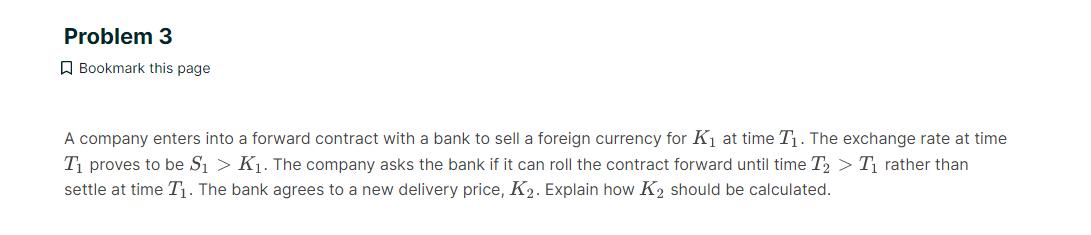

K_1
T_1
K_1 at time T_1 is S_1
S_1 > K_1
Roll contract T_2
and new price K_2 is calculated

Assume Exchange Rate Quote Domestic over International
Value of contract to bank is equal to cost savingings from purchasing foreign currency with foreign contract S_1 - K_1

S_1 * e**(r_f*(T_2 - T_1)) - K_2 * e**(r*(T_2 - T_1))


S_1 * e**(r_f*(T_2 - T_1)) 
The first term on the left-hand side,
S1 times the exponential of negative Rf times T2 minus T1,
is the present value of investing S1 units
the foreign currency at the foreign risk-free rate of Rf
from T1 to T2.

K_1 * e**(r*(T_2 - T_1))
The second term on the left-hand side,
K2 times the exponential of negative R times T2 minus T1,
is the present value of investing
K2 units of the foreign currency at the domestic risk-free rate
of R from T1 to T2.

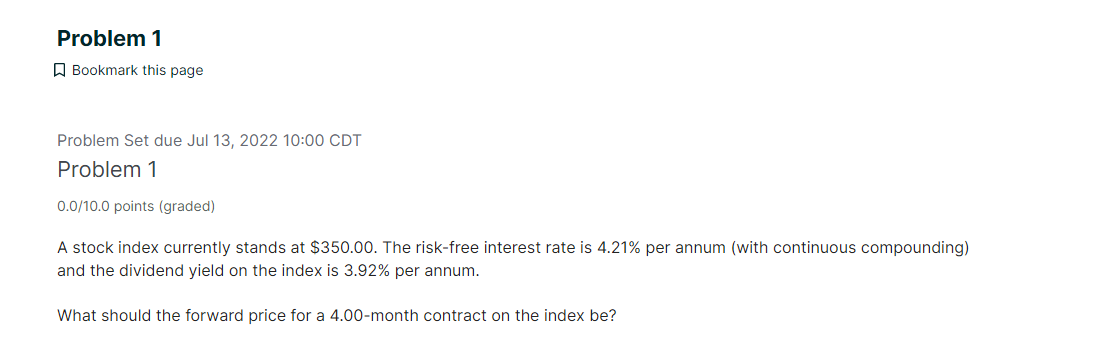

In [ ]:
350*math.e**((0.0421-0.0392)*(4/12))

350.3384969138161

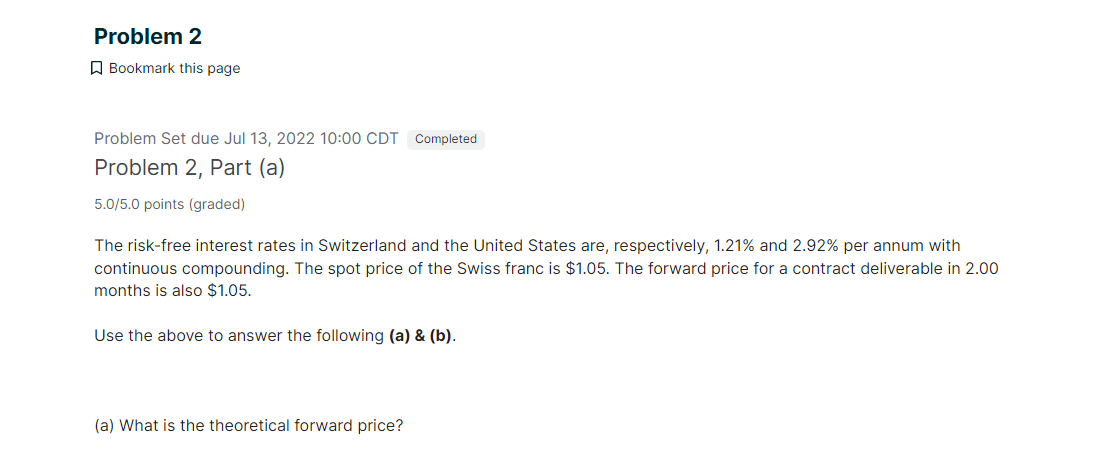

In [ ]:
1.05*math.e**((0.0292-0.0121)*2/12)

1.0529967683664851

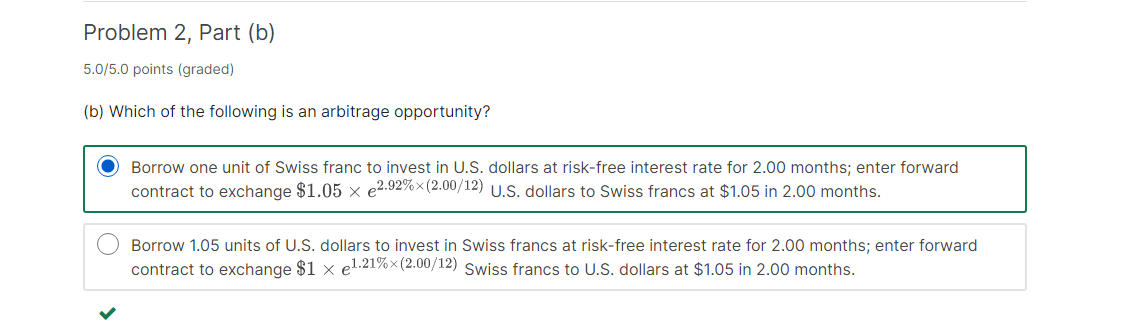

In [ ]:
# The Theoretical Forward Price is worth more in the future - USD / CHF so you want to buy USD to sell later

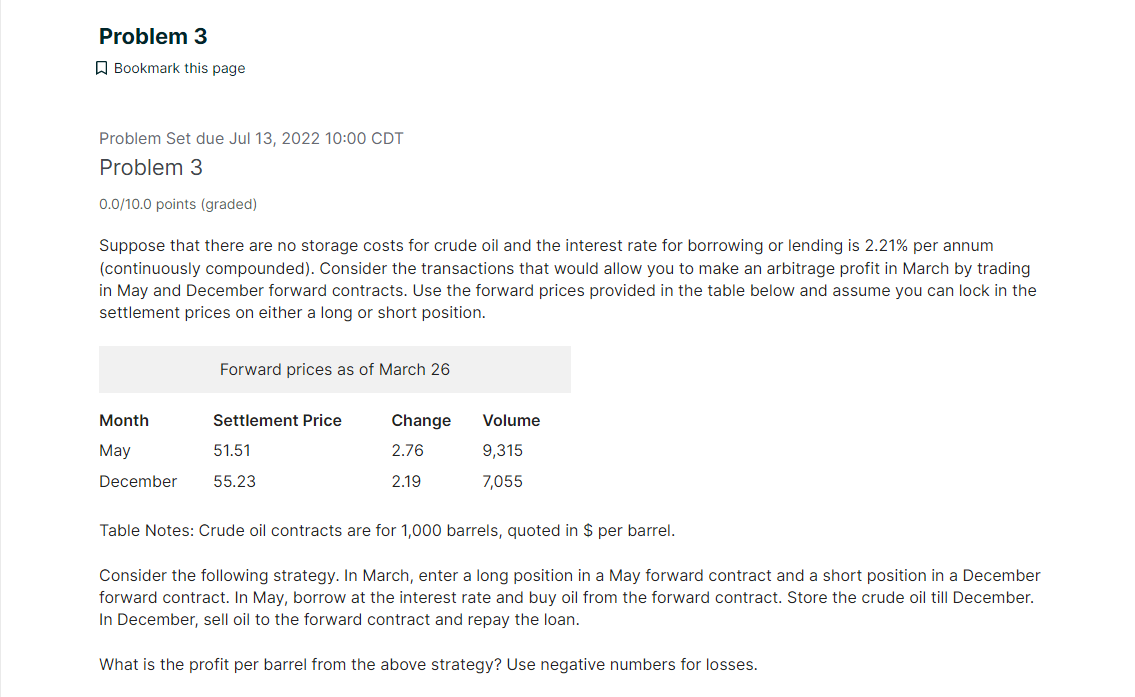

In [ ]:
long_may = 51.51
short_december = 55.23
r = 0.0221

profit = short_december-long_may*(math.e**(r*7/12))

In [ ]:
profit

3.0516514429197485

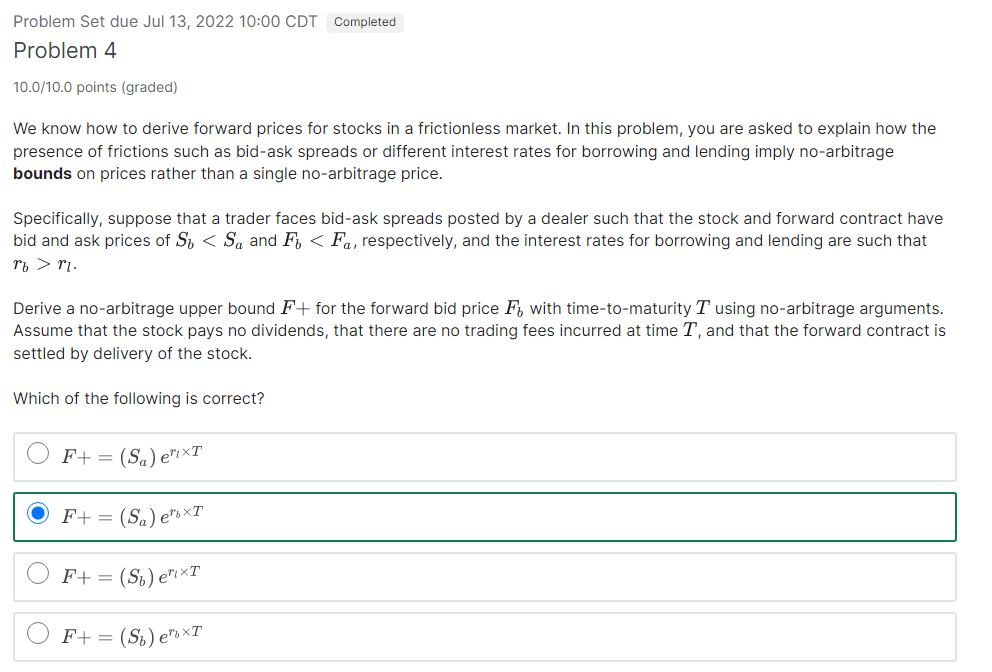

Upper Bound Frictions: always  ask price and if borrowing > lending then borrowing, lower bounds would be the inverse

# Swaps

In [ ]:
import pandas as pd

In [ ]:
d = {"Pounds":[0.11, 0.106], "Dollars":[0.07, 0.062]}
df = pd.DataFrame(data=d, index=["Company A", "Company B"])
df

,Pounds,Dollars
Company A,0.110,0.070
Company B,0.106,0.062


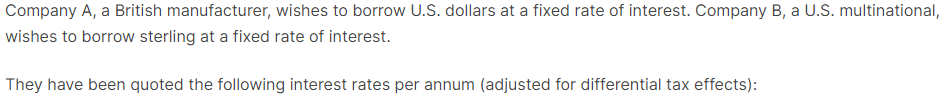

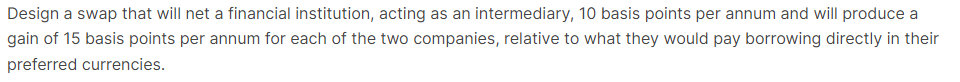

In [ ]:
savings = 0.0015
gain = ((df["Dollars"].loc["Company A"]-savings) - (df["Dollars"].loc["Company B"])) + ((df["Pounds"].loc["Company B"]-savings) - df["Pounds"].loc["Company A"])
gain

0.0010000000000000009

In [ ]:
format(gain, '.2%')

'0.10%'

In [ ]:
f"{gain:.2%} or 10 bps"

'0.10% or 10 bps'

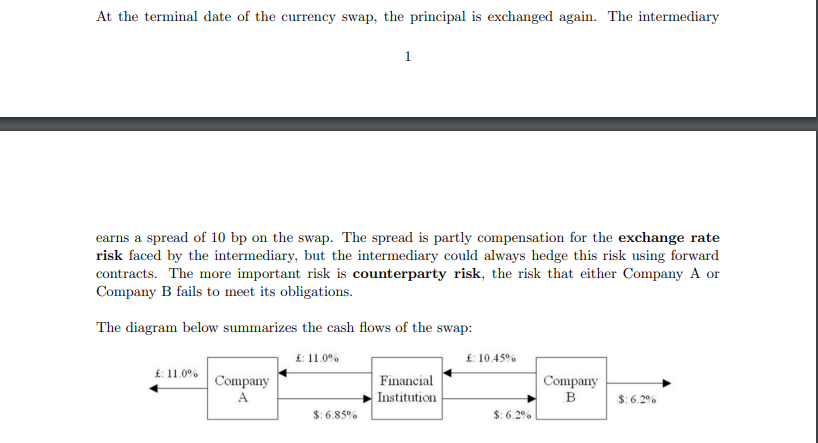

Hedge the exchange rate risk with a forward and only write this contract for credit worthy companies.


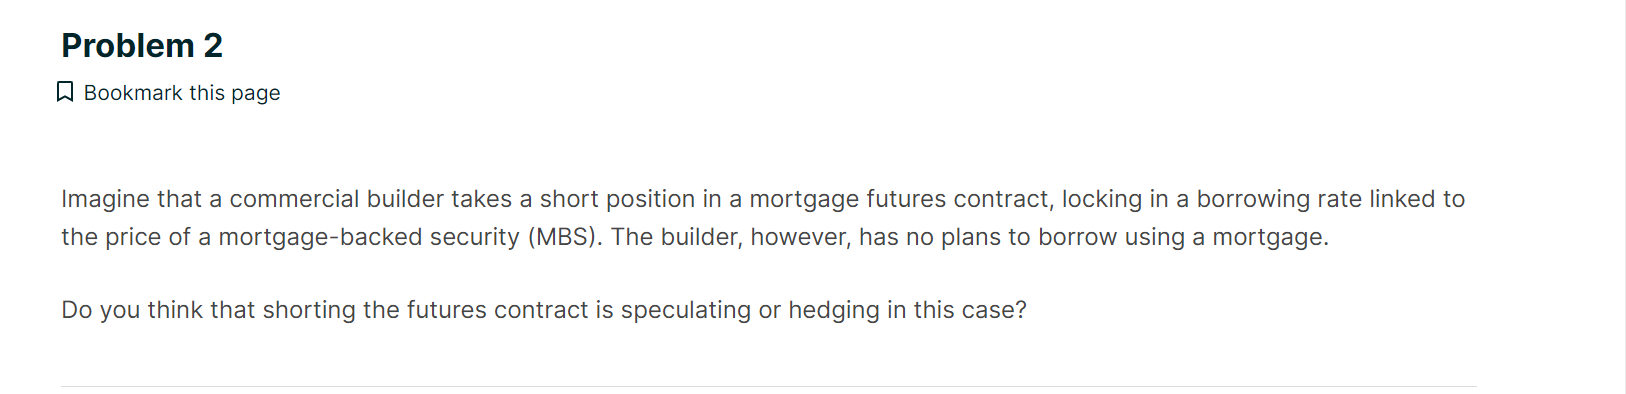

Short mortgage future contract @ Borrow Rate MBS - 
Components of short mortage futures =  -MBS and +Interest Rates.
Not a perfect hedge imo, but correlation of these components to the commerical building industry should provide some protection if the industry was to contract. 


MBS is backed by cash flows from a pool of mortgages. A mortgage futures contrat locks in a pre-specified price for a MBS--equivalently, a borrowing rate--in the future

A long Position in the mortgage futures contract will increase the value if the price of the MBS increases or, equivalently, if interest rates decrease.(Recall that prices and yields on fixed-income securities move inversely.) A short position, on the other hand, will decrease in value if the price of the MBS decreases or if interest rates increase.

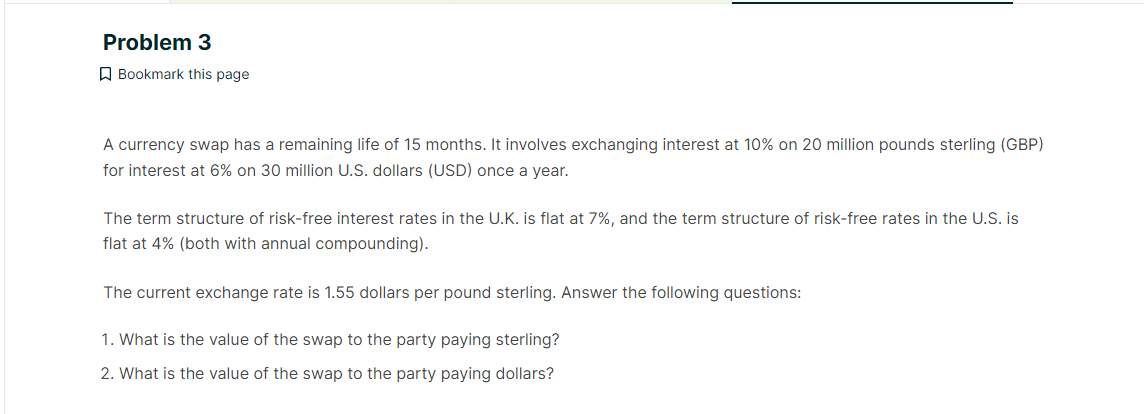

In [ ]:
# currency swap remaining life of 15 months
# exchanging interest at 10% on 20 million pounds sterling(GBP) for interest 6% on 30 million U.S. dollars (USD) once a year
#rfr in UK: 7% - rfr in U.S.: 4%
# Currency exchange rate is 1.55 dollars per pound sterling
import math

# Contract components
n = 15
sterling_ir = 0.10
sterling = 20000000
sterling_interest = sterling_ir * sterling
usd_ir = 0.06
usd = 30000000
usd_interest = usd_ir * usd
exchange_rate = 1.55 # dollar/sterling
rfr_uk = 0.07
rfr_usd = 0.04

#sterling bond underlying the bond value

sterling_interest_cf = (sterling_interest)/(1+rfr_uk)**((n-12)/12)  
sterling_principal_cf = (sterling_interest + sterling) / ((1+rfr_uk)**(n/12))
sterling_bond = sterling_interest_cf + sterling_principal_cf
print(f"Sterling Bond value: {sterling_bond:.2f}")

#usd bond underlying the bond value
usd_interest_cf = (usd_interest)/(1+rfr_usd)**((n-12)/12)  
usd_principal_cf = (usd_interest + usd) / ((1+rfr_usd)**(n/12))
usd_bond = usd_interest_cf + usd_principal_cf
print(f"Usd Bond value: {usd_bond:.2f}")

paying_sterling = usd_bond - (sterling_bond * exchange_rate)
paying_usd = -paying_sterling

# Can view this swap as a sequence of forward contracts
# CC IR
continous_sterling = math.log(1+rfr_uk)
continous_usd = math.log(1+rfr_usd)
#print(continous_sterling, continous_usd)
#3-month and 15-month forward exchange rates
three_month = exchange_rate*math.e**((continous_usd-continous_sterling)*3/12)
fifteen_month = exchange_rate*math.e**((continous_usd-continous_sterling)*15/12)
#print(three_month, fifteen_month)
three_sterling_forward = (usd_interest - sterling_interest * three_month)*math.e**(-continous_usd*(3/12))
fifteen_sterling_forward = (usd_interest - sterling_interest * fifteen_month)*math.e**(-continous_usd*(15/12))
principal_forward = (usd - sterling * fifteen_month)*math.e**(-continous_usd*(15/12))
#print(three_sterling_forward, fifteen_sterling_forward, principal_forward)
sterling_payer_swap = sum([three_sterling_forward, fifteen_sterling_forward, principal_forward])

print(f"Value of the party paying sterling and receiving dollars is {paying_sterling:.2f}")
print(f"Value of the party paying sterling and receiving dollars is {paying_usd:.2f}")

print(f"Value of the party paying sterling and receiving dollars **using portfolio of swaps method** is {sterling_payer_swap:.2f}") # Same number but explaination how we got there


Sterling Bond value: 22182349.50
Usd Bond value: 32061012.88
Value of the party paying sterling and receiving dollars is -2321628.84
Value of the party paying sterling and receiving dollars is 2321628.84
Value of the party paying sterling and receiving dollars **using portfolio of swaps method** is -2321628.84


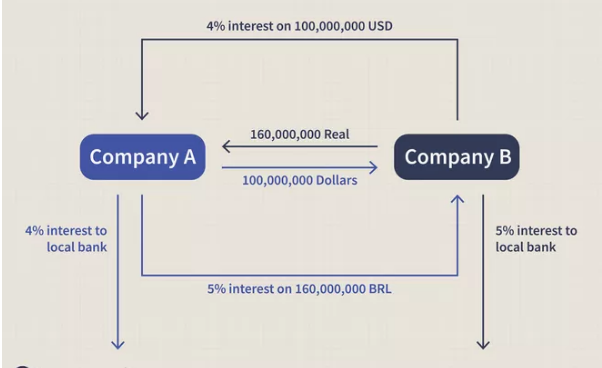

Nice example flow graph, Note numbers not for this contract

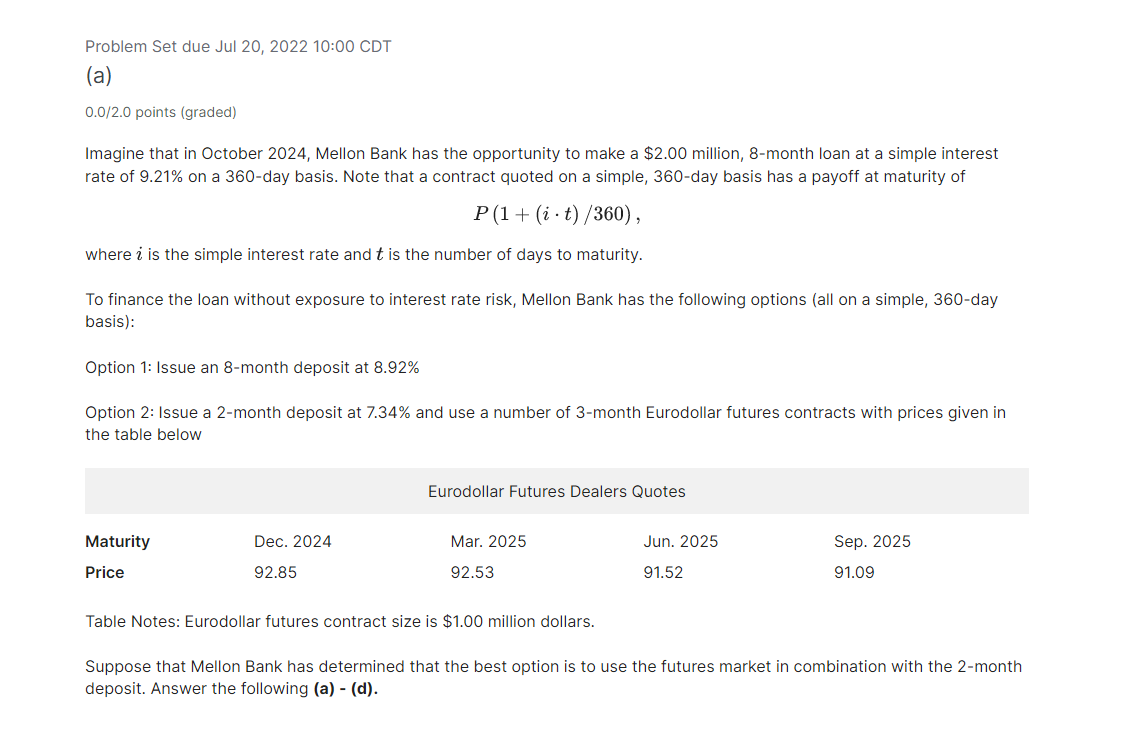

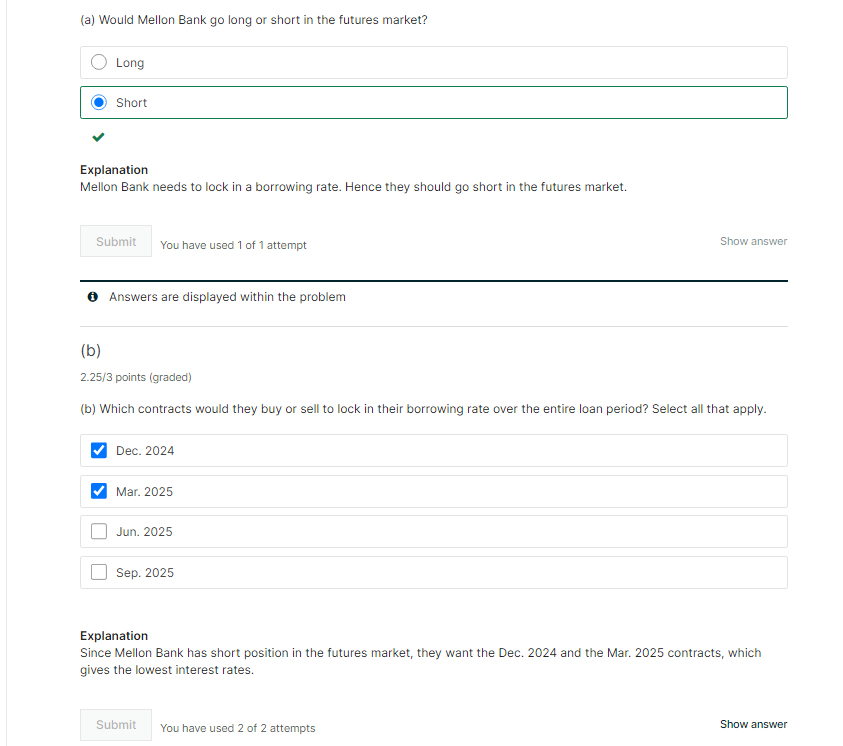

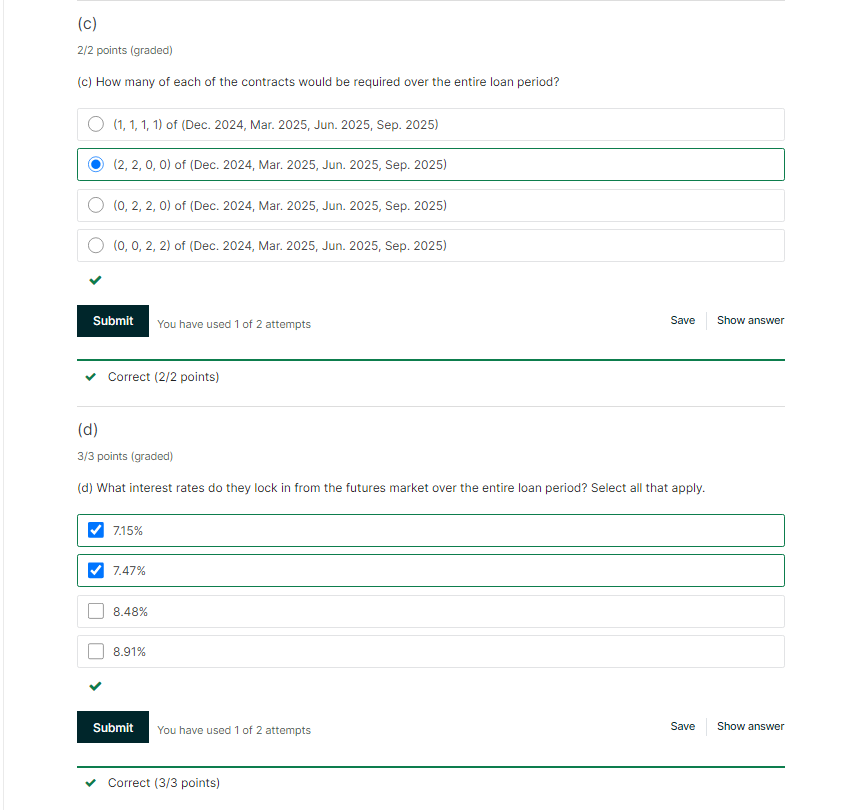

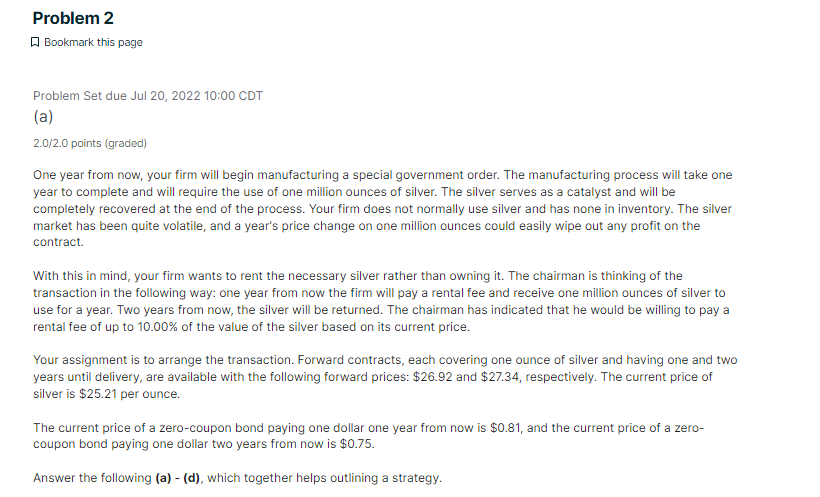

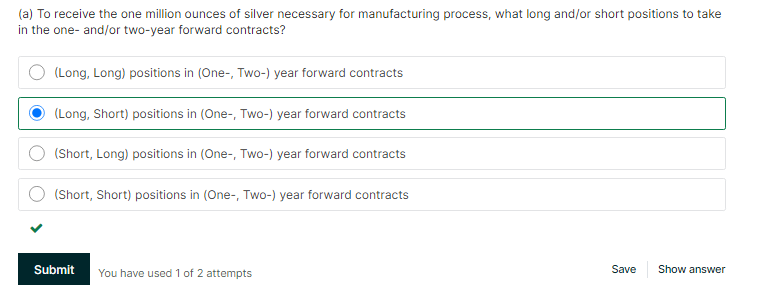

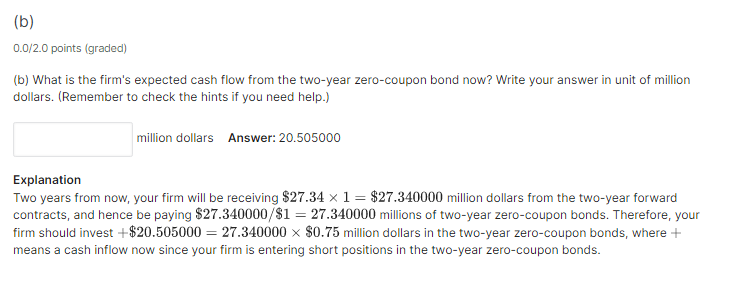

In [ ]:
f_one = 26.92
f_two = 27.13
zcb_one = 0.84
zcb_two = 0.75
spot = 25.52
n = 1000000

In [ ]:
short_principal = f_two * n

In [ ]:
cf = short_principal * zcb_two
print(f"${cf}")


$20347500.0


In [ ]:
f_one * n * zcb_one

22612800.0

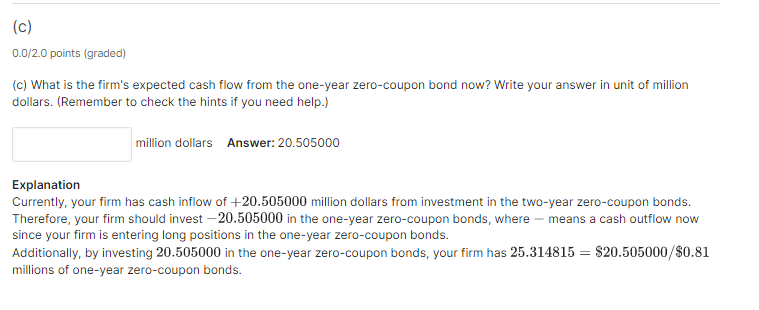

In [ ]:
# one_year_zcp = cf / zcb_one
# print(f"${one_year_zcp}")
cf / zcb_one

24223214.285714287

In [ ]:
"The chairman has indicated that he would be willing to pay a rental fee of up to 10.00% of the value of the silver based on its current price."
rental_fee = (spot * n) * 0.10
rental_fee

2552000.0

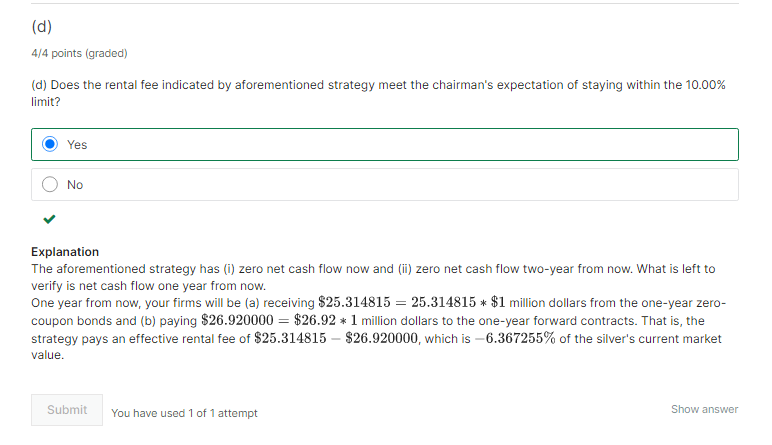

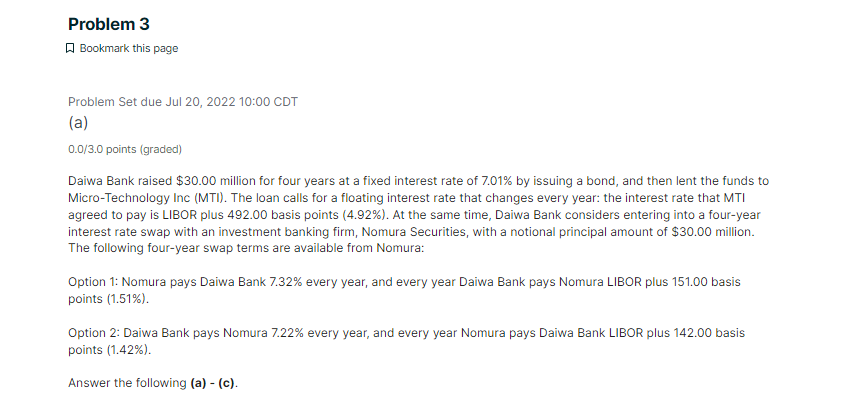

In [ ]:
n = 4
daiwa = 30000000
fixed_ir = 0.0703

libor = 0
floating_ir = libor + 0.0497


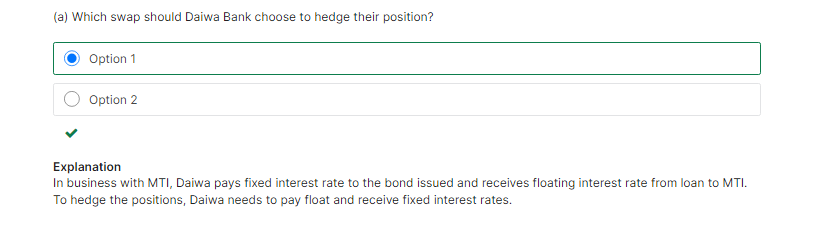

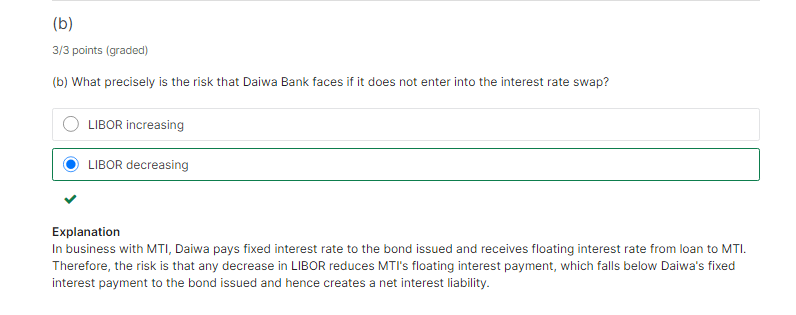

In [ ]:
hedge = 0.0731 - (libor+0.0152)
hedge

0.0579

In [ ]:
fixed_hedge = 0.0723 - 0.0703
floating_hedge = 0.0497 - 0.0152

fixed_hedge + floating_hedge

0.036500000000000005

In [ ]:
-7.03+4.97-1.52+7.31

3.729999999999999

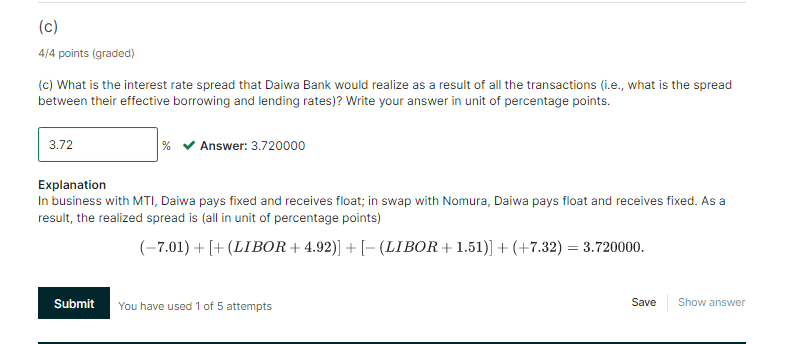

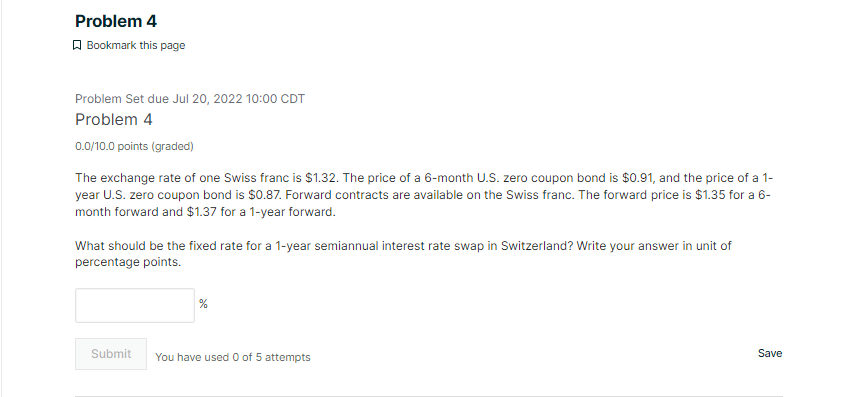

In [ ]:
er = 1.35 #franc/usd look at the denomination get get numerator/denominator
six_month_zcb = 0.09
year_zcb = 0.13

six_month_forward = 1.35
year_forward = 1.36

In [ ]:
3/5*(six_month_zcb) + 2/5*(year_zcb)

0.10600000000000001

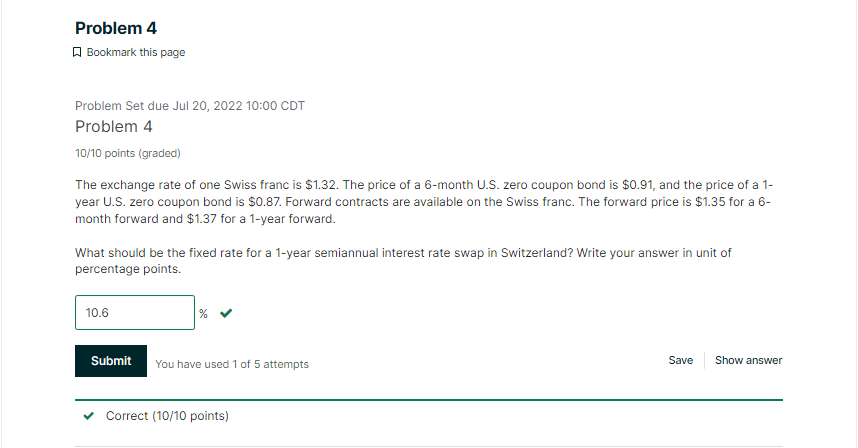

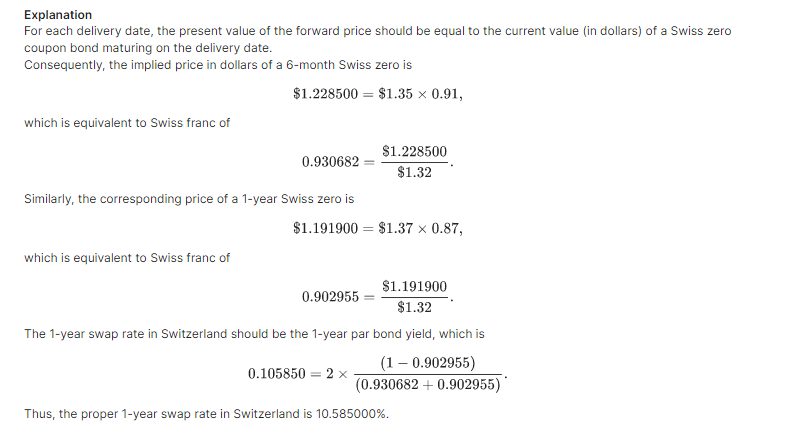

In [ ]:
a = 1.35*0.92/1.35
b = 1.36*0.88/1.35
2*(1-b)/(a+b)

0.1256355584713794